In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.business_analysis import get_plague_crops, get_plagues, get_crops

## Plague-Crop

In [3]:
plague_crops = get_plague_crops()

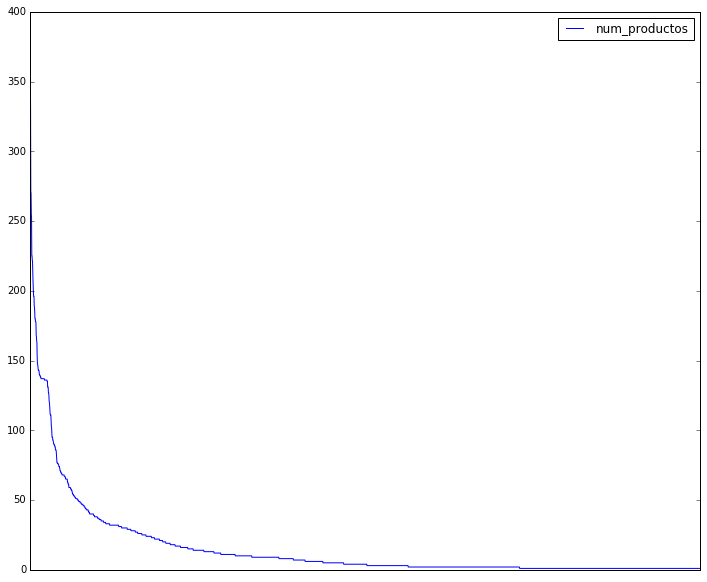

In [4]:
plague_crops.plot(figsize=(12,10))
plt.xticks(())
plt.show()

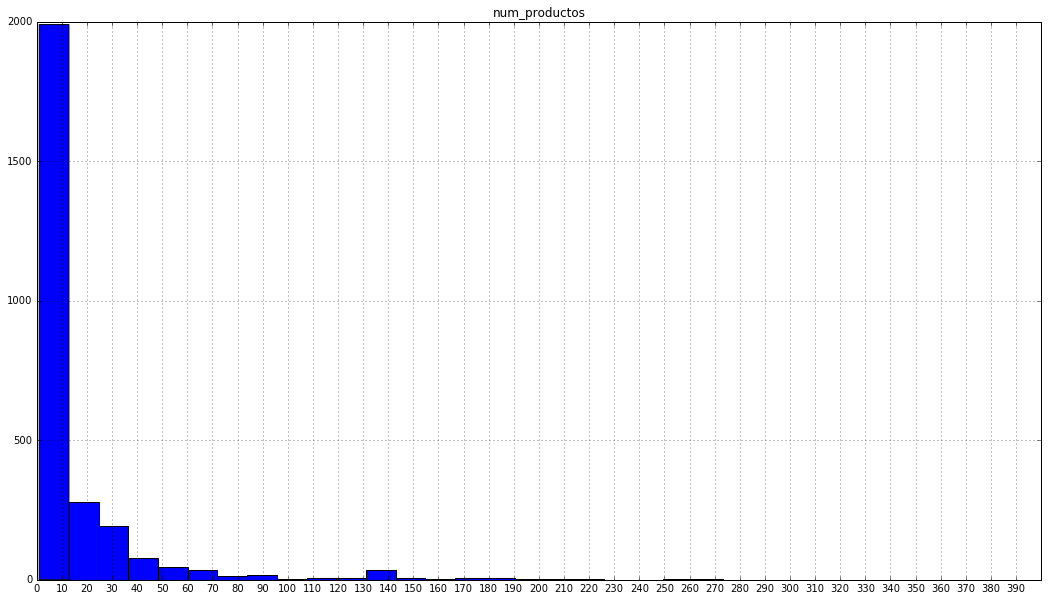

In [6]:
plague_crops.hist(figsize=(18,10), bins=30)
plt.xticks(np.arange(0,400,10))
plt.show()

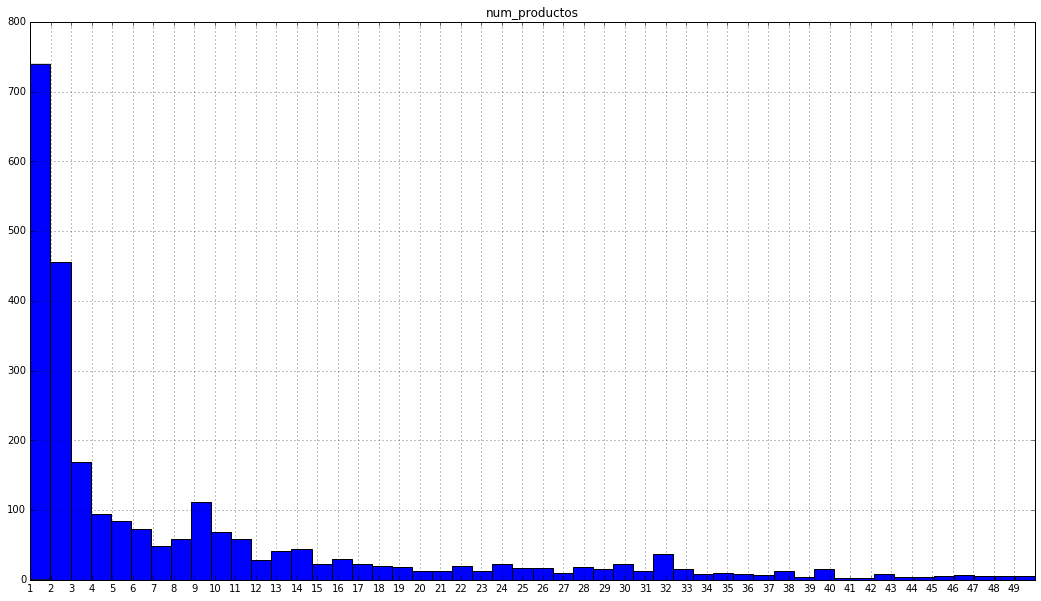

In [7]:
granularity = 50
plague_crops.loc[plague_crops["num_productos"] <= granularity].hist(figsize=(18,10), bins=granularity)
plt.xlim([1, granularity])
plt.xticks(np.arange(1,granularity,1))
plt.show()

## Plagues

In [8]:
plagues = get_plagues()

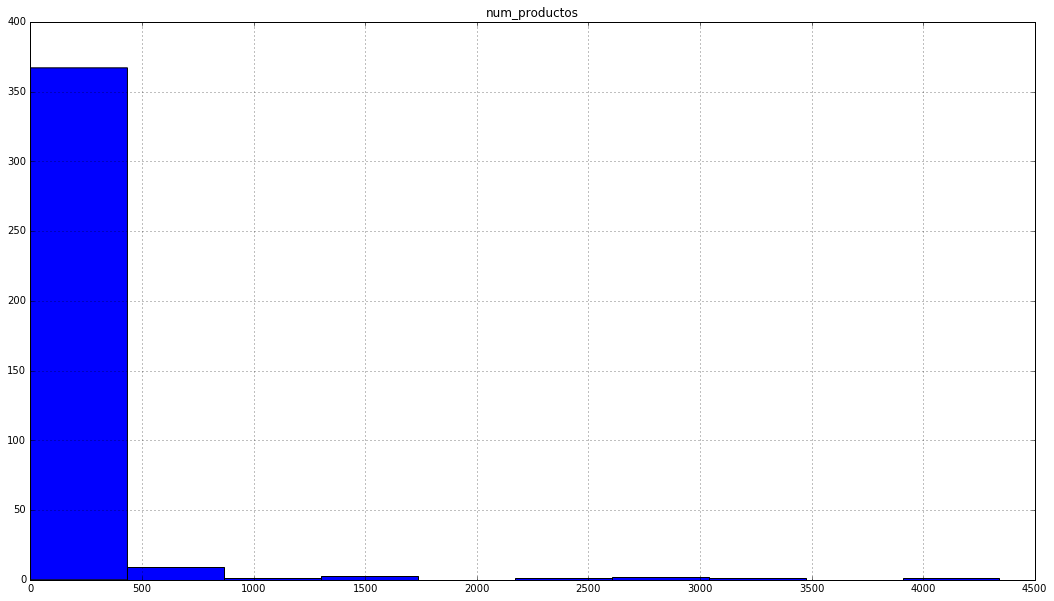

In [9]:
plagues.hist(figsize=(18,10)) #, bins=30)
#plt.xticks(np.arange(0,400,10))
plt.show()

## Crops

In [10]:
crops = get_crops()

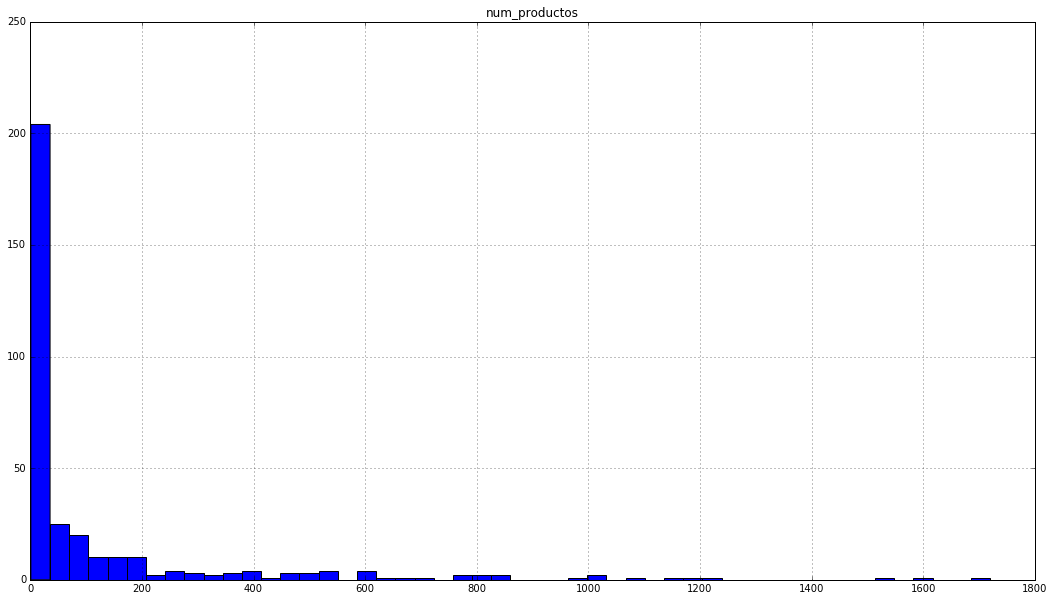

In [11]:
crops.hist(figsize=(18,10), bins=50)
#plt.xticks(np.arange(0,400,10))
plt.show()